<a href="https://www.kaggle.com/code/lugattuso/textblob-vs-vader-reviews-sentiment-analysis?scriptVersionId=154413371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of contents
* [Sentiment analysis using Womens Clothing E-commerce reviews](#section1)
    * [1.Introduction](#section0)
    * [2. Importing libraries and dataset](#section2)
    * [3. Cleaning up the dataset ](#section3)
    * [4. Exploratory Data Analysis (EDA)](#section4)
    * [5. Sentiment analysis](#section5)
    * [6. Business Insights](#section6)
    * [7. Conclusion](#section7)

<span id="1"></span>
#   Sentiment analysis using Womens Clothing E-commerce reviews

 [**Luciana Gattuso**](https://www.kaggle.com/lugattuso) 
 <hr/>


 # 1. Introduction <a class="anchor"  id="section0"></a>

When product owners seek to understand customer opinions and experiences, sentiment analysis emerges as a powerful tool to understand user satisfaction. This analytical approach involves assessing the sentiment conveyed in phrases or texts, decoding the emotional tone behind words with the aim of uncovering customer preferences, desires, and primary concerns. By leveraging sentiment analysis, businesses can gain valuable insights into how their products are perceived, enabling them to make informed decisions and tailor their offerings to better meet customer needs.

This notebook aims to analyze customer reviews from a women's clothing e-commerce dataset, which is publicly available on Kaggle. Detailed information about the dataset can be accessed from the Kaggle website [https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews]. The dataset encompasses various attributes, including Clothing ID, Age, Review Title, Review Text, Rating, Division Name, Department Name, and Class Name.

The primary focus of this analysis will be on the 'Review Text' provided by customers, accompanied by their respective ratings on a scale from 1 to 5, where 5 denotes the highest satisfaction and 1 the lowest. Additionally, the analysis will take into account the 'Department' category, which covers a range of product types such as bottoms, dresses, intimates, jackets, etc., as well as the specific product 'Class'. Age of the reviewers will also be considered as a potentially insightful variable.

This analysis is designed to technically compare two prominent sentiment analysis tools, TextBlob and VADER, by delving into their key features and methodologies. The study will commence with an overview of the necessary libraries and proceed with data cleansing, followed by an Exploratory Data Analysis (EDA) to thoroughly comprehend the dataset, laying the groundwork for future insights. Subsequently, the focus will shift to an in-depth examination of TextBlob and VADER, juxtaposing their capabilities to ascertain which tool offers superior accuracy. Concluding the study, the analysis will pivot towards deriving business-centric insights, translating the technical findings into practical, actionable intelligence.

## Sentiment Analysis: The Roles of TextBlob and VADER

TextBlob is an open-source Python library tailored for processing textual data. It offers a straightforward API for performing basic Natural Language Processing (NLP) tasks. Integral to TextBlob's functionality is the Natural Language Toolkit (NLTK), a comprehensive library supporting a wide array of lexical resources and capabilities, including categorization and classification.

VADER (Valence Aware Dictionary and sEntiment Reasoner), on the other hand, is a pre-trained tool optimized for quick results, particularly beneficial in analyzing social media language. It excels at interpreting short, informal sentences, often laced with slang and abbreviations, common in social media contexts. However, its accuracy diminishes with longer, more structured sentences, making it a suitable starting point rather than a comprehensive solution.

Broadly speaking, there are two main approaches to sentiment analysis:

**Rule-Based Analysis:** This approach relies on predefined rules and keyword mappings, assigning numerical scores to gauge sentiment. TextBlob and VADER fall into this category. The primary limitation of rule-based algorithms is their lack of contextual understanding, an aspect this notebook aims to explore.

**Data-Driven Analysis:** In contrast, this method employs machine learning algorithms, trained on large datasets, to output a numerical value representing sentiment. This approach is generally more nuanced, capturing the subtleties of context and varied linguistic expressions.
By delving into these methodologies, this notebook seeks to investigate the constraints of rule-based sentiment analysis and compare it with data-driven approaches.

To start with, I will be approaching a Rule-Based Analysis.

## Analysis workflow
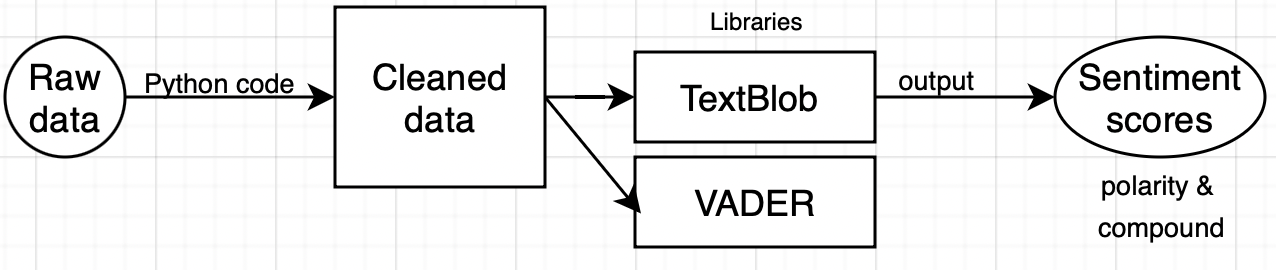

# 2. Importing libraries and dataset <a class="anchor"  id="section2"></a>

In [1]:
    pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, CountVectorizer

#Sentiment Analysis
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Checking the current directory of the project before providing the file path
import os
os.listdir('/kaggle/input/womens-ecommerce-clothing-reviews')

['Womens Clothing E-Commerce Reviews.csv']

In [4]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

(23486, 11)


# 3. Cleaning up the dataset <a class="anchor"  id="section3"></a>
## 3.1 Initial Data Inspection


### To start with the cleaning process, a quick look once over of the dataset is useful to identify any outliers.

In [5]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
17797,17797,862,57,"Colors not great on me.,..",I bought three of these tees. i kept the turqu...,3,1,0,General Petite,Tops,Knits
775,775,1110,35,Armholes huge,This didn't work for me. im normally a m (8/10...,2,0,0,General Petite,Dresses,Dresses
51,51,862,41,Love,I absolutely love this bib tee! it's probably ...,5,1,2,General,Tops,Knits
19765,19765,965,32,Looks cheap,I didn't realize that the grey sleeves are att...,1,0,0,General Petite,Jackets,Jackets
22786,22786,335,37,Wearable art,"Love, love, love these leggings! a soft, color...",5,1,5,General Petite,Intimate,Lounge


### The data set contains 23,486 rows of data. At first glance, the dataset has one column that appears to contain redundant index information. The following code is to drop that column.

In [6]:
df = df.drop(columns = "Unnamed: 0")

### In addition, the column names could be improved and converted to snake case without spaces separated by an underscore, and all letters in lowercase.

In [7]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


## 3.2 Handling Missing Values


### Also, another good practice is to give a check on how many Null values there are in the dataset. 

Note: I personally like doing this before converting the objects into strings to avoid converting NA values into actual strings.

In [8]:
df.isna().sum() 

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

### Most of the null values are concentrated in the title column. Because we will not be working with this column during the analysis, this does not affect the results. The number of null values in *review_text* is also significant but this will be address in the next block of code.

In [9]:
rows_with_na = df[df['review_text'].isna()]
print(rows_with_na)

       clothing_id  age title review_text  rating  recommended_ind  \
92             861   23   NaN         NaN       5                1   
93            1081   31   NaN         NaN       5                1   
98            1133   50   NaN         NaN       5                1   
135            861   35   NaN         NaN       4                1   
142           1126   35   NaN         NaN       5                1   
...            ...  ...   ...         ...     ...              ...   
23258          862   35   NaN         NaN       4                1   
23301          862   52   NaN         NaN       5                1   
23303          823   46   NaN         NaN       5                1   
23470         1104   39   NaN         NaN       5                1   
23480          862   35   NaN         NaN       5                1   

       positive_feedback_count   division_name department_name class_name  
92                           0  General Petite            Tops      Knits  
93     

### The following code displays the rows of reviews that are empty (all these coincide with having an empty title as well). Out of the total 23,486 actual rows, 845 have null values on *review_text* and 3810 null *titles*. So by removing the empty *review_texts* rows we reduce the instances of null titles as well. Also, because the analysis is mostly based on *review_text*, the Nan values on *title* have no impact on our analysis.
### The way of dealing with null values will be different depending on the data we are handling and the purpose of the analysis. In this case, I'd like to know what percentage of the dataset these null values on reviews represents. 

In [10]:
total_rows = len(df)
missing_rows = df['review_text'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 3.60%


### Next step would be to drop rows with missing values from Reviews.

In [11]:
df = df.dropna(subset=['review_text'])

### In addition, the 14 Nan values appearing in *division_name* are going to be removed, this will probably also resolve the Nan of *department_name* and *class_name*.

In [12]:
df = df.dropna(subset=['division_name'])

In [13]:
df.isna().sum() 

clothing_id                   0
age                           0
title                      2966
review_text                   0
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                 0
department_name               0
class_name                    0
dtype: int64

## 3.3 Checking for Duplicates 
### The following code evaluates each column of the DataFrame to identify rows containing identical data. The outcome marks duplicates as True while the first occurrence of any duplicate row remains unmarked (ex. False)

In [14]:
df[df.duplicated()]

#Note to self: Why double df[]? Because in order to get it filtered by the boolean indexing. 

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


## 3.4 Data Type Optimization
### Identifying data types in order to find mismatches and correctly setting data types is important for effective data cleaning and analysis.

In [15]:
df.dtypes

clothing_id                 int64
age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

### **Object** data types can be memory-intensive, especially if the column contains long strings or if there are many unique string values. In contrast, using more specific data types like *int* or *category* can save memory and improve performance.

### Also, in order to detect which ones are Categories, getting unique values from columns stored as Object could be a useful.

In [16]:
unique_division_name = df['division_name'].unique()
unique_department_name = df['department_name'].unique()
unique_class_name = df['class_name'].unique()

print("Unique values in the unique_division_name:", unique_division_name)

print("Unique values in the unique_department_name:", unique_department_name)

print("Unique values in the unique_class_name:", unique_class_name)

Unique values in the unique_division_name: ['Initmates' 'General' 'General Petite']
Unique values in the unique_department_name: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']
Unique values in the unique_class_name: ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


### In this case, we could see there are some mispelled words like ¨Intimates¨ and replacing the wrong ones.

In [17]:
df['division_name'] = df['division_name'].str.replace('Initmates', 'Intimates')
df['department_name'] = df['department_name'].str.replace('Intimate', 'Intimates')

###  Columns converted into Category type.

In [18]:
df['division_name'] = df['division_name'].astype('category')
df['department_name'] = df['department_name'].astype('category')
df['class_name'] = df['class_name'].astype('category')

### Double checking boolean types and storing properly.

In [19]:
df['recommended_ind'].unique()

array([1, 0])

In [20]:
df['recommended_ind'] = df['recommended_ind'].astype('bool')

### Checking on how our new dataframe column's types.

In [21]:
df.dtypes

clothing_id                   int64
age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind                bool
positive_feedback_count       int64
division_name              category
department_name            category
class_name                 category
dtype: object

## 3.5 Age validation test

In [22]:
min_age = df['age'].min()
max_age = df['age'].max()

if (min_age>18 & max_age<99):
    print(f"Test passed: Age goes from {min_age} to {max_age} which is makes sense.")
else:
    print(f"Test not passed, age goes from {min_age} to {max_age} ")

Test passed: Age goes from 18 to 99 which is makes sense.


## 3.6 Data Index Reset
### It's often a good idea to reset the index for clarity and consistency, especially if the DataFrame will be used for further transformations or analyses.

In [23]:
df.reset_index(drop=True, inplace=True) 
#Note to self: inplace=True to avoid adding the old index as a new column

# 4. Exploratory Data Analysis (EDA) <a class="anchor"  id="section4"></a>

## 4.1 Qualitative Analysis
## Dataset's structure
### To gain a more comprehensive insight into the organization of the dataframe, a pivot table is utilized. This tool effectively illustrates the hierarchical arrangement of departments within divisions, providing a clear view of the dataset's structure.

In [24]:
pivot_table = pd.pivot_table(df, values='class_name', index=['division_name', 'department_name'], #lists unique class names for each department
                             aggfunc=lambda x: x.unique())

display(pivot_table)

class_name
division_name  department_name                                                   
General        Bottoms          ['Pants', 'Skirts', 'Jeans', 'Shorts', 'Casual...
               Dresses          ['Dresses']
Categories (20, object): ['Blouses...
               Jackets          ['Outerwear', 'Jackets']
Categories (20, objec...
               Tops             ['Blouses', 'Sweaters', 'Knits', 'Fine gauge']...
               Trend            ['Trend']
Categories (20, object): ['Blouses',...
General Petite Bottoms          ['Pants', 'Skirts', 'Jeans']
Categories (20, o...
               Dresses          ['Dresses']
Categories (20, object): ['Blouses...
               Intimates        ['Lounge']
Categories (20, object): ['Blouses'...
               Jackets          ['Jackets', 'Outerwear']
Categories (20, objec...
               Tops             ['Knits', 'Blouses', 'Fine gauge', 'Sweaters']...
               Trend            ['Trend']
Categories (20, object): ['Blouses',...
Intimates      Intimates        ['Intimates', 'Lounge', 'Sleep', 'Swim', 'Legw...

### The dataset is structured into three primary divisions: General, General Petite, and Intimates. Each of these divisions encompasses various departments, which are further categorized into classes.
#### General Division: This division includes a range of departments such as Bottoms, Dresses, Jackets, Tops, and Trend.
* The Bottoms department features classes like Pants, Skirts, Jeans, Shorts, and Casual Bottoms.
* The Dresses department is singularly classified as Dresses.
* In the Jackets department, you find classes like Outerwear and Jackets.
* The Tops and Trend departments have their respective unique classes.

#### General Petite Division: This division mirrors the General division with departments like Bottoms, Dresses, Jackets, Tops, and Trend. Additionally, it includes the Intimates department. Similar to the General division, the Bottoms, Dresses, Jackets, Tops, and Trend departments in General Petite have corresponding classes. The Intimates department under General Petite features specific classes pertinent to this category.
#### Intimates Division: The Intimates division is more specialized and contains a single department, Intimates, which encompasses various classes tailored to intimate apparel.
### To make this analysis more efficient, during the EDA phase we will explore the relationships between variables, and we will exclude *department_name* from the analysis, using only *division_name* and *class_name* as Product Type.

## 4.2 Quantitative Analysis
## A. Reviews distributions per Division and Ratings

### In the following analysis I aim to get a deeper understanding on the Customer's reviews for the Divisions: General, General Petite and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews. Also, the nature of Customer's satisfaction with their purchases.
### This block of code allows plotting 2 graphs on the same line, by enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

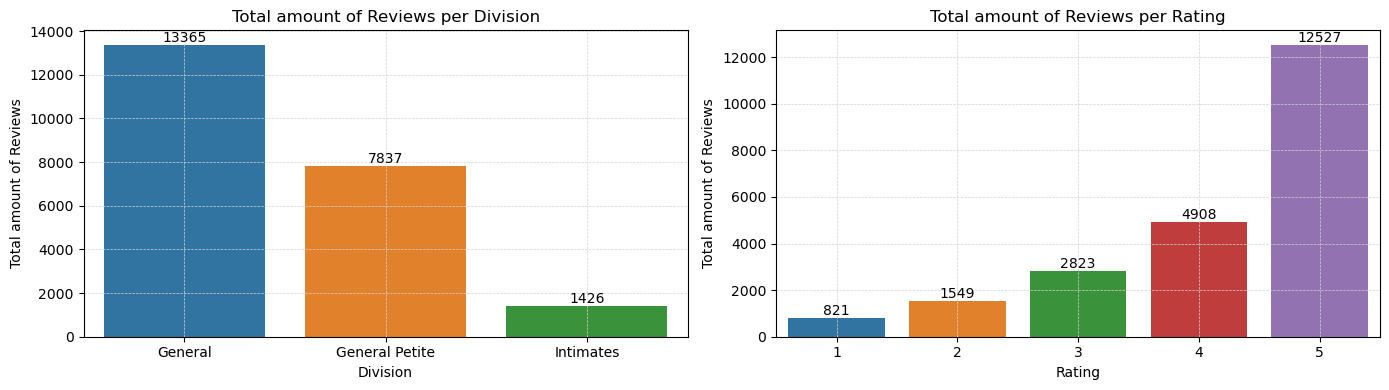

In [25]:
row_plots = ["division_name", "rating"]

f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False) # Create a figure and a set of subplots

# First plot: Total amount of Reviews per Division
division_counts = df['division_name'].value_counts().sort_index()
sns.barplot(x=division_counts.index, y=division_counts.values, ax=axes[0])

for i, count in enumerate(division_counts.values):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

axes[0].set_xlabel('Division')
axes[0].set_ylabel('Total amount of Reviews')
axes[0].set_title('Total amount of Reviews per Division')
axes[0].grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)

# Second plot: Total amount of Reviews per Rating
rating_counts = df['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[1])

for i, count in enumerate(rating_counts.values):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Total amount of Reviews')
axes[1].set_title('Total amount of Reviews per Rating')
axes[1].grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0)

plt.tight_layout()
plt.show()

### In terms of Divisions, customers predominantly buy from the General division, General Petite in second place and Intimates in third place.
### The displayed plot reveals a concentration of customer reviews primarily in the 5 rating category, indicating that the dataset is predominantly positive in nature.

In [26]:
percentage_5_stars = (df['rating'] == 5).sum() * 100 / len(df)
print(f'5 stars ratings represent {percentage_5_stars:.2f}% of the dataframe')

5 stars ratings represent 55.36% of the dataframe


## B. Ratings distribution per *class_name* or Type of product

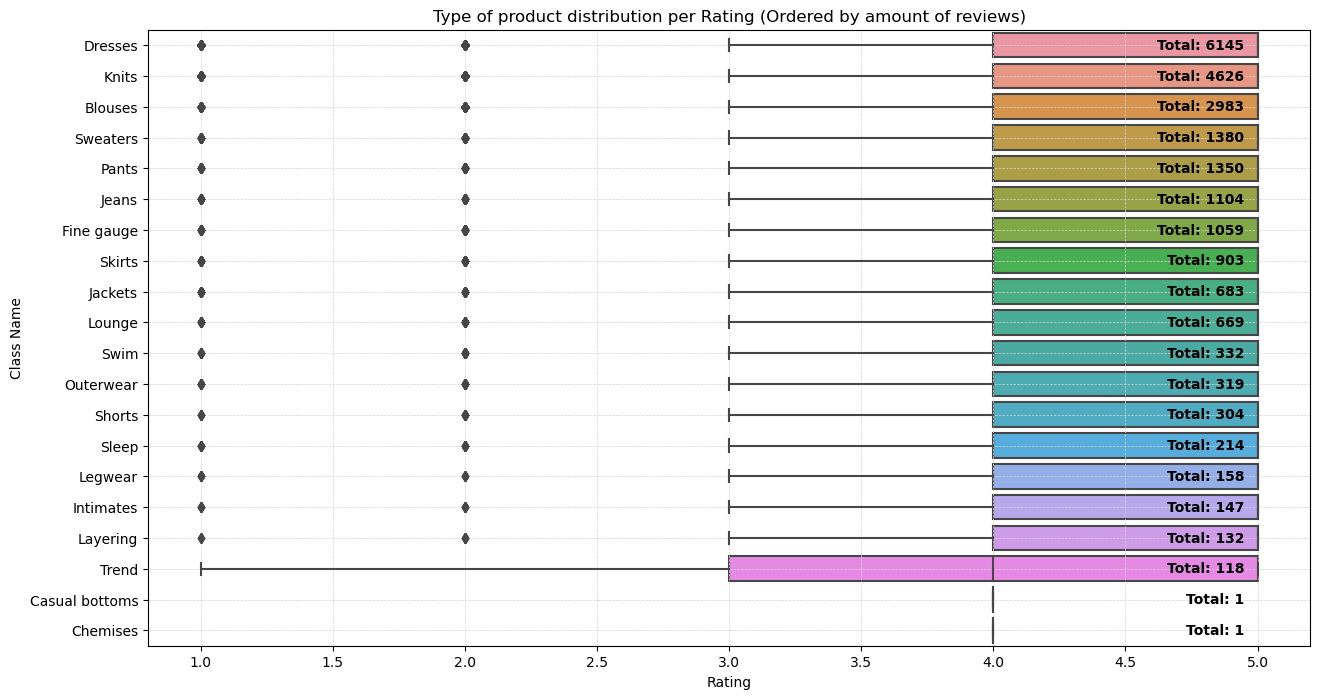

In [27]:
medians = df.groupby('class_name')['rating'].count().sort_values(ascending=False) #median values per group

sorted_names = medians.index.tolist() #order by medians

plt.figure(figsize=(15, 8))
ax = sns.boxplot(x=df['rating'], y=df['class_name'], order=sorted_names)

plt.xlabel('Rating')
plt.ylabel('Class Name')

x_max = ax.get_xlim()[1]

for i, class_name in enumerate(sorted_names):
    count = medians[class_name]
    ax.text(x_max -0.25, i, f'Total: {count}', va='center', color='black', fontweight='bold', ha='right') #total count of reviews

plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 
plt.title('Type of product distribution per Rating (Ordered by amount of reviews)')
plt.show()

### Despite the divison and departmental categories, this plot aims to analyze a general view of clothes per class. Displaying the distribution of the ratings, this boxplot makes it easy to detect outliers and which classes have the lower general rating. Totals are showing the total number of reviews per class.
### The most common rating in this plot is the highest possible rating (5) with a distribution of the ratings left-skewed,indicating a an overall satisfaction with most of the products and with a couple of outliers located in ratings 1 and 2. 

### **Trend** as a class seems to have the lower minimum values. To get further information a quick describe table will be displayed.

### Another relevant characteristic is that Casual bottoms and Chemises have only one review per Class. 

In [28]:
one_review = df[(df['class_name'] == 'Casual bottoms') | (df['class_name'] == 'Chemises')]
display(one_review)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
11952,45,26,"Cute pants, but short.",These pants have a really cute design. however...,4,True,0,General,Bottoms,Casual bottoms
12946,10,38,Comfy and cute,This dress is comfortable and a great piece to...,4,True,0,Intimates,Intimates,Chemises


### About Casual bottoms, in this case there is only one pair of pants which should be included in 'Pants' Class.
### For Chemises, it appears to be a misclassification of the source because the review describes shoes that go well with the product, in this case dress, implying that it is a dress for going out and not a product part of Intimates.

In [29]:
casual_b = df[(df['class_name'] == 'Casual bottoms')]
chemises = df[(df['class_name'] == 'Chemises')]

indices_to_change = list(casual_b.index) + list(chemises.index) #indices combined in a singles list

new_class_names = ['Pants', 'Dresses']

for i in range(len(indices_to_change)):
    index = indices_to_change[i]
    new_class_name = new_class_names[0] if i < len(casual_b) else new_class_names[1]
    df.at[index, 'class_name'] = new_class_name

### Successfully recategorized those 2 cases.

In [30]:
grouped_data = df.groupby('class_name')['rating'].describe()

filtered_data = grouped_data[grouped_data['count'] > 0]

sorted_data = filtered_data.sort_values(by=('mean'))

display(sorted_data) #note to self: color Trend, Sweaters

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
Trend,118.0,3.838983,1.313769,1.0,3.0,4.0,5.0,5.0
Dresses,6146.0,4.138789,1.127554,1.0,4.0,5.0,5.0,5.0
Blouses,2983.0,4.142809,1.140846,1.0,4.0,5.0,5.0,5.0
Knits,4626.0,4.145698,1.121563,1.0,4.0,5.0,5.0,5.0
Sweaters,1380.0,4.168841,1.134104,1.0,4.0,5.0,5.0,5.0
Swim,332.0,4.171687,1.125392,1.0,4.0,5.0,5.0,5.0
Outerwear,319.0,4.181818,1.129165,1.0,4.0,5.0,5.0,5.0
Skirts,903.0,4.229236,1.095014,1.0,4.0,5.0,5.0,5.0
Fine gauge,1059.0,4.237960,1.079117,1.0,4.0,5.0,5.0,5.0


#note to self: When you perform a group-by operation on categorical data in pandas,  all categories should be include that were defined in the original DataFrame, even if they don't appear in the subset. This is why it shows rows with 0 counts and NaN values for classes that are not actually present in your subset df_trend. To solve this, it is neccesary to ensure that the categorical columns in the subset only contains categories that are actually present in that subset. useful function: remove_unused_categories() 

### This table shows the class statistics sorted by average. Leading the way is Trend with a total of 118 opinions and an average of 3.83. This class is well below the rest, with a mean well below the rest of the classes. The rest of the classes have a spectrum of averages from 4.13 to 4.34. The minimum value of all classes is 1. 

In [31]:
df_trend_class = df[df['class_name'] == 'Trend']

In [32]:
unique_clothing_ids = df_trend_class['clothing_id'].nunique()

total_reviews = df_trend_class['rating'].count()

print(f"Trend class - Unique Clothing IDs: {unique_clothing_ids}")
print(f"Trend class - Total Reviews: {total_reviews}")

Trend class - Unique Clothing IDs: 38
Trend class - Total Reviews: 118


### As we saw previously, the standard distribution of the dataframe is to have 50% on a 5.0 rating and a mean higher of 4.13. To find where are located the lowest ratings for Trend, I'm grouping the 118 reviews by the 42 unique products (*clothing_id*) in this class and plotting a boxplot filtered by a mean of 4.13 to expose a non standard distribution.

In [33]:
grouped_data = df_trend_class.groupby('clothing_id')['rating'].describe()

filtered_data = grouped_data[grouped_data['mean'] < 4.13]

df_filtered_trends = filtered_data.sort_values(by=('mean'))

total_unique_clothing_ids = df_filtered_trends.shape[0]
total_reviews = df_filtered_trends['count'].sum()

print(f"Trend class - Products with a mean < 4.13 - Total Unique Clothing IDs: {total_unique_clothing_ids}")
print(f"Trend class - Products with a mean < 4.13 - Total Reviews: {total_reviews}")

Trend class - Products with a mean < 4.13 - Total Unique Clothing IDs: 20
Trend class - Products with a mean < 4.13 - Total Reviews: 68.0


### With a total of 20 products with a mean under 4.13 representing 57% of the total Trend reviews explaining the reasons for this class to have a lower mean than the rest. The reasons of it will be explore in the Sentiment analysis section.

## C. Age

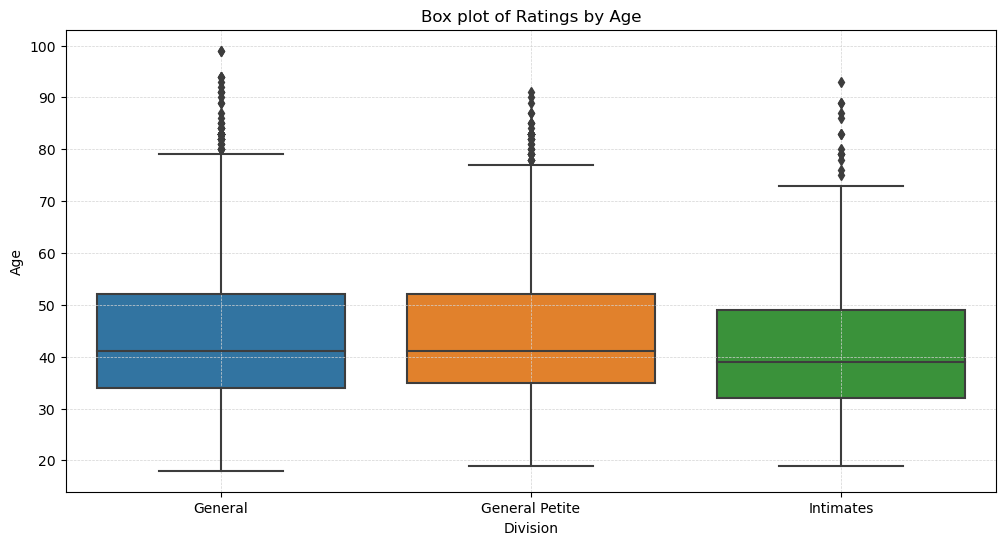

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='division_name', y='age')
plt.title('Box plot of Ratings by Age')
plt.xlabel('Division')
plt.ylabel('Age')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, which='both', zorder=0) 
plt.show()

### General has a median in 41 years, it's oldest outlier is 100 years old. Meantime, General Petite has the same mean but the oldest outlier is 91 years old. Also, the distribution of Age per division shows us that Intimates division has a generally young audience age where the mean is 39 years old and the Q3 (75%) is younger than 50 years. This is the youngest of all 3 divisions.

# E. Case Study: 100 products with the lowest average ratings

### The first thing to do is to group the ratings per product in order to get the mean of each of them, as well as counting the amount of ratings and counting the ones with rating = 1. In these first lines of code I won’t filter the results, because it could be useful to retain all the available data for now, in case we want to do any other similar inquiries later.

In [35]:
ratings_per_product = df.groupby('clothing_id').agg(
    avg_rating=('rating', 'mean'),
    count_ratings=('rating', 'size'),
    count_ones=('rating', lambda x: (x == 1).sum())  # Count reviews with rating of 1
)
#print(ratings_per_product)

### With the total data grouped by the amount of ratings, the following code filters by cases of more than one rating =1 and filters the 10 lowest average ratings. 
Using df.nsmallest(), a function that returns the first N occurrences ordered by a particular column in ascending order.

In [36]:
filter_higher_one = ratings_per_product[ratings_per_product['count_ones'] > 1]
N = 100
filter_lowest_avg = filter_higher_one.nsmallest(N, 'avg_rating')

#display(filter_lowest_avg) 

In [37]:
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_20/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Create a subdataframe with the results and merging it to other extra useful info.


In [38]:
filtered_df = df[df['clothing_id'].isin(filter_lowest_avg.index)] #filter by clothing_id

grouped_ratings = filtered_df.groupby('clothing_id')['rating'] #group by clothing_id per rating


idx = grouped_ratings.idxmin() #index of the minimum rating for each group

lowest_rated_reviews = df.loc[idx]

merged_data = pd.merge(filter_lowest_avg, lowest_rated_reviews[['clothing_id','age', 'review_text', 'rating', 'class_name', 'division_name']], 
                  left_index=True, right_on='clothing_id', how='left') #merge products per ratings with lowest-rated reviews

lowest_avg_ratings = merged_data
display(merged_data.head(10))

,avg_rating,count_ratings,count_ones,clothing_id,age,review_text,rating,class_name,division_name
6196,1.000000,2,2,973,58,"Even at a very deep discount, this piece is definitely not worth the money. the picture made me think this jacket had a longer curved velvet hem as part of its design (which would be cool)--which is largely what attracted me to it, but as i discovered when it arrived, that was actually part of the shirt worn beneath in the photo. so this image is rather misleading. the actual jacket is very thin--more like a shirt with an open front than a jacket. the pockets are just loosely tacked inside. for",1,Jackets,General Petite
11858,1.800000,5,2,569,64,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret.",1,Trend,General
9539,2.000000,4,2,588,32,"The picture makes the shorts look structured. i assumed they were made of a heavier cotton material. i was disappointed when they turned out to be a light weight polyester. \r\n\r\nalso, this runs way too big. i am busty and did not fill out the top of the xs.\r\n\r\ni wouldn't even buy this at the sale price.",1,Shorts,General
16427,2.181818,11,4,229,46,"Ordered on line and thought these are a great quality as i pulled them out of the box. tried them on and found minimal elastic for the waist. within minutes of wearing, the waist fell down past my hips...glad i was at home. looks cute but will not stay up.",1,Legwear,Intimates
9998,2.888889,9,2,1039,44,"These are terribly unflattering the wash looks dirty and the rise is not 10.5 like the description says, which is the only reason i gambled on these it is 13"".",1,Jeans,General
3404,3.105263,19,2,929,68,I was interested in this sweater because i actually thought it was a tunic. the sweater is much shorter than i thought. i wish i could return it. i bought a size large which is my normal size.,1,Sweaters,General
4301,3.222222,9,2,1145,51,I am not sure who would look good in this dress. it is extremely oversized with tons of fabric that will not flatter anyone!,1,Trend,General
3828,3.291667,24,4,1055,60,"I ordered these because of the side zipper, but they zip in front, even though the order listing and bag label called them ""wine, side zip pants."" they were also at least two sizes larger than marked and very flimsy material. what bothers me is that i was charged $5.95 to send them back, even though the product description (and the name before someone changed it on the website) were wrong.",1,Pants,General Petite
1878,3.333333,24,3,1016,35,Cute skirt but i agree with the other reviewer. you can't get it on! i tried my skinny daughter tried no go!,1,Skirts,General
8727,3.400000,5,2,971,36,"This blazer looks great on the model and i have a long torso so i thought it would be perfect. when i got it it looked like a big box and didn't fit anywhere. the shoulder pads were giant and the bottom of the coat was huge. i got a small based on other reviews, but it was way too big. sadly, i had to return it.",1,Jackets,General Petite


### Validation test: Before using .loc[], you can check if the indices in idx are present in df using set(idx).issubset(df.index). This will return True if all indices in idx are in df.

In [39]:
if (set(idx).issubset(df.index) == True):
    print("Test passed: idx´s index has everything of the df index")
else:
    print("Test not passed")    
    
#.issubset() to check if the indices are present in the original DataFrame is prudent. It ensures the integrity of your analysis.

Test passed: idx´s index has everything of the df index


### In summary, this type of distribution is often positive for evaluations, but warrants further investigation. If ratings are uniformly high, it could indicate excellent performance or, in some cases, it could suggest a bias in data collection or an unrepresentative sample. For example, some online platforms actively encourage users to leave reviews, sometimes offering incentives. This can influence the likelihood of customers leaving reviews, regardless of whether their experience was particularly positive or negative.
### For this, we will analyze with the TextBlob and Vader tools the reasons for the lower ratings and analyze the textual comments to better understand the user experience. 

# 5. Sentiment analysis <a class="anchor"  id="section5"></a>
## 5.1 Overview of TextBlob and VADER Tools

### As mentioned in the introduction, during this project Textblob and VADER will be utilized. First, I'm running a simple test to know how they work.

In [40]:
analyzer = SentimentIntensityAnalyzer() # loading Vader 

text = "This is a good example of VADER sentiment analysis"

vader_sentiment_scores = analyzer.polarity_scores(text)

print("Positive:", vader_sentiment_scores['pos'])
print("Negative:", vader_sentiment_scores['neg'])
print("Neutral:", vader_sentiment_scores['neu'])
print("Compound:", vader_sentiment_scores['compound'])

Positive: 0.266
Negative: 0.0
Neutral: 0.734
Compound: 0.4404


In [41]:
text_blob = TextBlob("This is a good example of a TextBlob")
sentiment_blob = text_blob.sentiment

polarity_blob = sentiment_blob.polarity
subjectivity_blob = sentiment_blob.subjectivity

print("TextBlob Polarity:", polarity_blob)
print("TextBlob Subjectivity:", subjectivity_blob)

TextBlob Polarity: 0.7
TextBlob Subjectivity: 0.6000000000000001


### In these examples, we have two different sentiment analysis tools providing sentiment scores for two similar statements. 

#### **TextBlob:** It provides polarity and subjectivity scores. In Example 1, the polarity score is 0.7, indicating a positive sentiment, and the subjectivity score is 0.6, indicating a moderate level of subjectivity.

#### **VADER:** It provides positive, negative, neutral, and compound scores. In Example 2, the compound score is 0.6369, which suggests a positive sentiment. The positive score (0.458) is the highest, indicating a positive sentiment.

#### Both tools generally agree on the sentiment of the given statements, classifying them as positive. However, the exact numeric scores may differ because each tool employs its own sentiment analysis algorithms and scoring systems. Additionally, TextBlob provides a subjectivity score, which VADER does not include in its output.


## 5.2 Integration of Sentiment Analysis in the Dataset
### A. Adding Textblob and Vader to the dataframe

In [42]:
desc_blob = [TextBlob(desc) for desc in df['review_text']] #loading descriptions into textblob

In [43]:
#TEXTBLOB sentiment metrics into the dataframe
df['tb_pol'] = [b.sentiment.polarity for b in desc_blob]
df['tb_subj'] = [b.sentiment.subjectivity for b in desc_blob]

#VADER metrics into dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['review_text']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['review_text']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['review_text']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['review_text']]

### Displaying a selection of columns to understand behavior

In [44]:
selected_columns = ['clothing_id', 'review_text', 'rating', 'recommended_ind', 'tb_pol',
                    'tb_subj', 'compound', 'neg', 'neu', 'pos']

columns_to_highlight = ['rating', 'compound', 'tb_pol']

styled_df = df[selected_columns].head(10).style.hide(axis="index") \
                    .format({"tb_pol": "{:.2f}",
                             'tb_subj': "{:.2f}",
                             "compound": "{:.2f}",
                             "neg": "{:.2f}",
                             "neu": "{:.2f}",
                             "pos": "{:.2f}"}) \
                    .background_gradient(cmap='RdYlGn', subset=columns_to_highlight) 

display(styled_df)

clothing_id,review_text,rating,recommended_ind,tb_pol,tb_subj,compound,neg,neu,pos
767,Absolutely wonderful - silky and sexy and comfortable,4,True,0.63,0.93,0.89,0.00,0.32,0.68
1080,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,True,0.34,0.73,0.97,0.00,0.70,0.30
1077,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,False,0.07,0.36,0.92,0.03,0.83,0.14
1049,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,True,0.55,0.62,0.57,0.21,0.40,0.40
847,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,True,0.51,0.57,0.93,0.00,0.70,0.30
1080,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,False,0.18,0.53,0.94,0.00,0.86,0.14
858,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,True,0.13,0.61,0.68,0.04,0.87,0.09
858,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,True,0.17,0.50,-0.09,0.04,0.91,0.05
1077,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,True,0.00,0.38,0.72,0.00,0.84,0.16
1077,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,True,0.20,0.47,0.87,0.05,0.77,0.18


### Both polarity (from TextBlob) and compound score (from VADER) are metrics that try to capture the overall sentiment of a text, in slightly different ways. Because they aim to represent similar concepts, it's reasonable to see how each correlates with explicit ratings. 

#### 1. **Polarity (TextBlob)**:
#### - Ranges from -1 to 1.
#### - A value closer to 1 means positive sentiment, a value closer to -1 means negative sentiment, and values close to 0 indicate neutral sentiment.

#### 2. **Compound Score (VADER)**:
#### - Also ranges from -1 to 1.
#### - A positive compound score signifies a positive sentiment, a negative one signifies a negative sentiment, and scores close to 0 are neutral.
#### - VADER, being designed specifically for social media text, takes into account intensifiers, emojis, and other nuances.

### Before advancing to further analysis, the cleaned dataset, now inclusive of TextBlob and VADER scores, will be stored in the Kaggle Working space as a CSV file for future iterations.

In [45]:
df.to_csv('/kaggle/working/tb_vader.csv', index=False)

### B. Distribution of the compound and polarity against rating   

### At this stage in the project, we can present a box plot of the distribution of user ratings (1:5) and sentiment scores (-1:1) determined by the sentiment analysis tools TextBlob and VADER. These observations suggest that the two tools apply different thresholds for determining what constitutes positive and negative sentiment. 

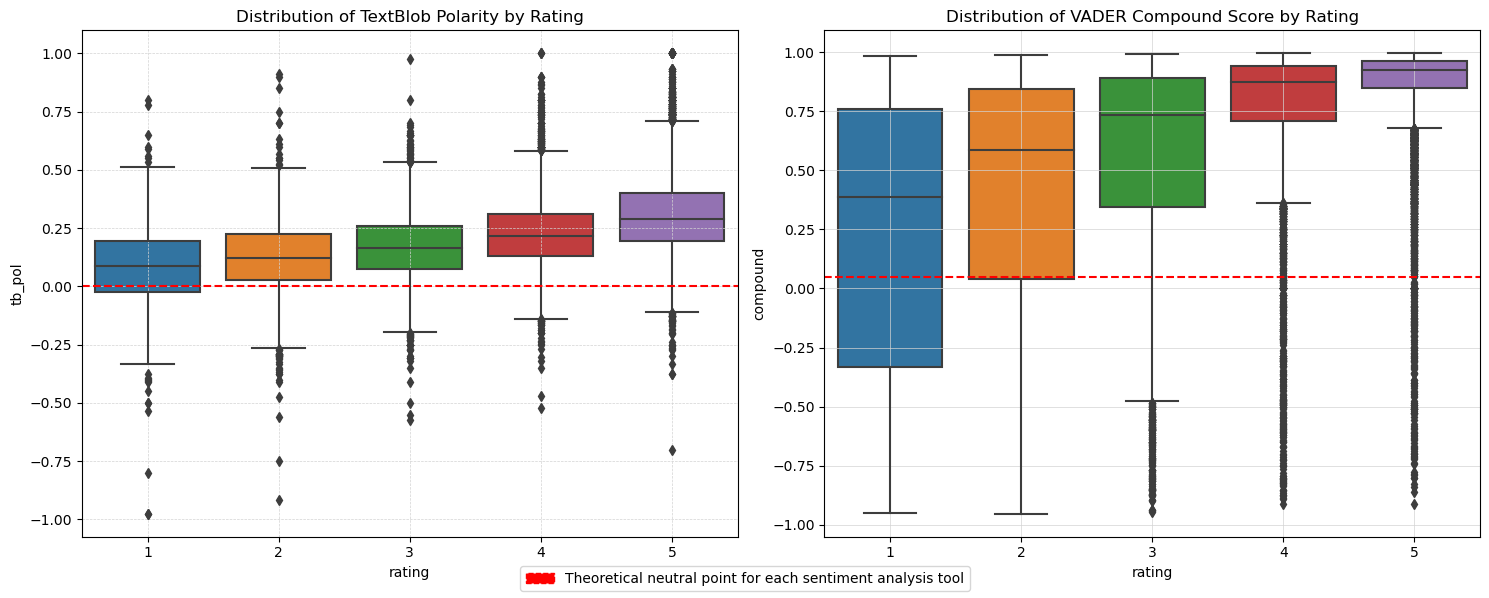

In [46]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['rating'], y=df['tb_pol'])
plt.axhline(0.00, color='red', linestyle='--')  # adds horizontal line at y=0.05 for neutral point

plt.title('Distribution of TextBlob Polarity by Rating')
plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.5, zorder=0) 

plt.subplot(1, 2, 2)
sns.boxplot(x=df['rating'], y=df['compound'])

plt.axhline(0.05, color='red', linestyle='--')  #adds horizontal line at y=0.05 for neutral point
plt.title('Distribution of VADER Compound Score by Rating')
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5, which='both', zorder=0) 

plt.subplots_adjust(bottom=0.2) #subplot layout adjusted to make space for the legend below

red_line = mpatches.Patch(color='red', linestyle='--', label='Theoretical neutral point for each sentiment analysis tool')

plt.figlegend(handles=[red_line], loc='lower center', ncol=1)

plt.tight_layout()
plt.show()

### It seems that the Textblob's polarity distribution have less amplitude and is more concentrated than Vader's. 

In [47]:
tb_medians = df.groupby(['rating'])['tb_pol'].median() 
vader_medians = df.groupby(['rating'])['compound'].median()

print("TextBlob Median Sentiment Scores by Rating:")
for rating, median in tb_medians.items():
    print(f"Rating {rating}: {median:.2f}")

print("\nVADER Median Sentiment Scores by Rating:")
for rating, median in vader_medians.items():
    print(f"Rating {rating}: {median:.2f}")

TextBlob Median Sentiment Scores by Rating:
Rating 1: 0.09
Rating 2: 0.12
Rating 3: 0.16
Rating 4: 0.21
Rating 5: 0.29

VADER Median Sentiment Scores by Rating:
Rating 1: 0.39
Rating 2: 0.59
Rating 3: 0.73
Rating 4: 0.88
Rating 5: 0.93


## 5.3 Determining Sentiment Thresholds

### In theory, VADER proposes that scores above 0.05 are considered positive, below 0.05 negative, and exactly 0.05 neutral. TextBlob, on the other hand, considers scores above 0 as positive, below 0 as negative, and 0 as neutral. This discrepancy implies that there is a varying spectrum of sentiment classification between the two tools, which warrants recalibration of the thresholds to align with empirical user rating data.
### For a better interpretation of the sentiment of a text from the analysis, new thresholds will be defined to better fit this dataset. With the baseline assumption that user ratings 3 as neutral and the median of calculated would be placed as NEUTRAL would be Texblob 0.16 and VADER 0.73.

## 5.4 Sentiment Classification

### The following blocks of code aim to classify tool's sentiment results, transforming Textblob's Polarity, Vader's Compound and User's ratings into the categories: Positive, Negative and Neutral. This is done using the thresholds defined in the previous section.

In [48]:
#VADER INTO SENTIMENT
def find_sentiment_vader(compound_score):
    if compound_score > 0.73:
        return "POSITIVE"
    elif compound_score < 0.73:
        return "NEGATIVE"
    else:
        return "NEUTRAL"   
    
df['vader_sentiment'] = df['compound'].apply(find_sentiment_vader)

In [49]:
#TEXTBLOB INTO SENTIMENT
def find_sentiment_textblob(tb_pol):
    if tb_pol > 0.16:
        return "POSITIVE"
    elif tb_pol < 0.16:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df['tb_sentiment'] = df['tb_pol'].apply(find_sentiment_textblob)

In [50]:
#RATINGS INTO SENTIMENT
def find_sentiment_rating(rate):
    if rate > 3:
        return "POSITIVE"
    elif rate < 3:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df['rating_sentiment'] = df['rating'].apply(find_sentiment_rating)

## 5.5 Classification Stats

### Once the classification have been applyied to the dataframe, the following turns them into insightful results.

In [51]:
def compare_sentiments(row):
    return {
        'tb_match': row['tb_sentiment'] == row['rating_sentiment'],
        'vader_match': row['vader_sentiment'] == row['rating_sentiment']
    }

comparison_df = pd.DataFrame([compare_sentiments(row) for _, row in df.iterrows()])

results = {
    'TextBlob': {
        'matches': comparison_df['tb_match'].sum(),
        'not_matches': (~comparison_df['tb_match']).sum(),
        'accuracy': comparison_df['tb_match'].mean() * 100
    },
    'Vader': {
        'matches': comparison_df['vader_match'].sum(),
        'not_matches': (~comparison_df['vader_match']).sum(),
        'accuracy': comparison_df['vader_match'].mean() * 100
    }
}

for analyzer, stats in results.items():
    print(f"{analyzer} Accuracy: {stats['accuracy']:.2f}%")
    print(f"{analyzer} Total matches: {stats['matches']}")
    print(f"{analyzer} Total not matches: {stats['not_matches']}")
    
#Note to self: This results dictionary divided in 2 parts: the tool, inside each tool there is these 3 elements. 
#analyzer&stats asigned to be able to call the elements

TextBlob Accuracy: 66.56%
TextBlob Total matches: 15061
TextBlob Total not matches: 7567
Vader Accuracy: 71.03%
Vader Total matches: 16073
Vader Total not matches: 6555


In [52]:
#test_comparison_df = df.apply(compare_sentiments, axis=1)
#print(test_comparison_df)

#Note to self: double checking how the code works, df.iterrows() for each line selects pairs of (index, row data). 
#Example:
#0        {'tb_match': True, 'vader_match': True}  
#Then it ignores the index '0' because of this: for _, row in 
#And transforms the list of mdictionaries into a DataFrame

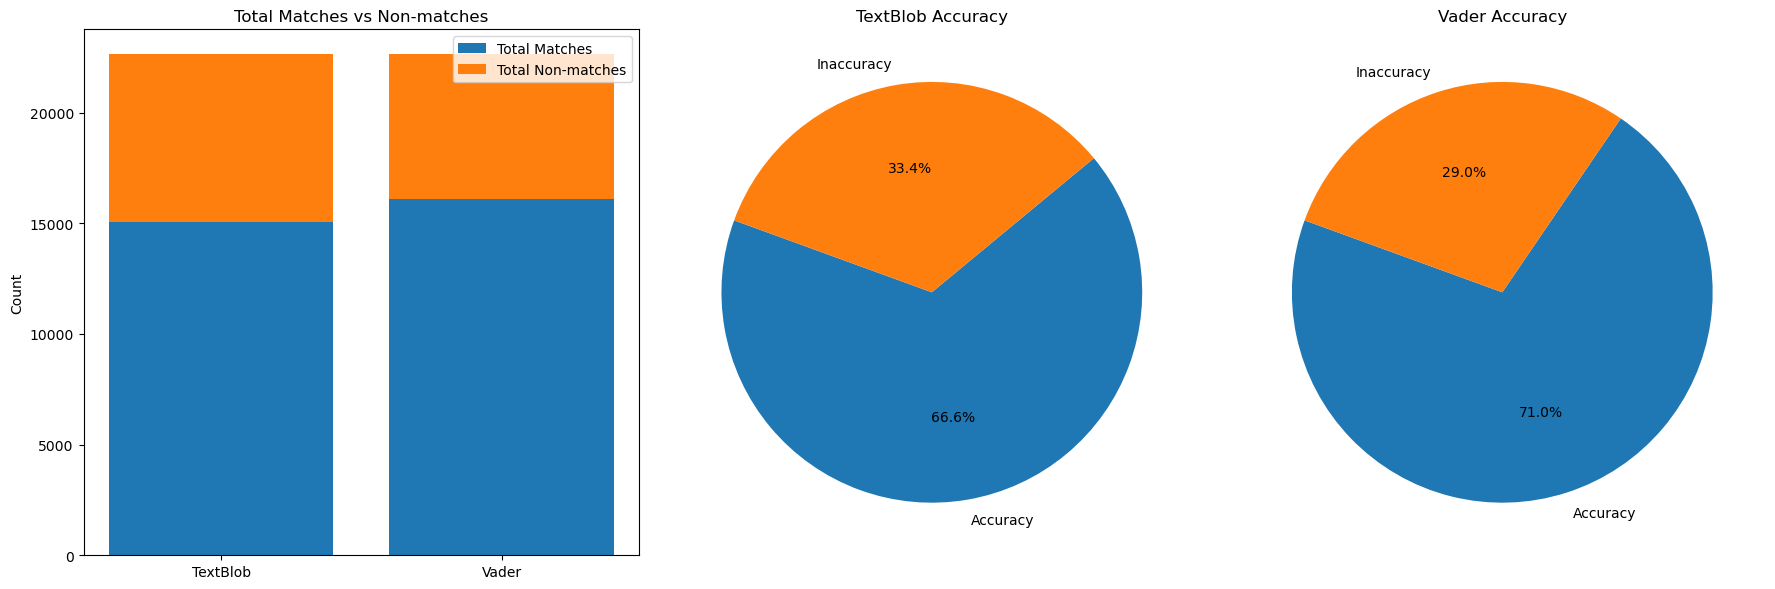

In [53]:
analyzers = list(results.keys())
accuracies = [results[analyzer]['accuracy'] for analyzer in analyzers]
matches = [results[analyzer]['matches'] for analyzer in analyzers]
not_matches = [results[analyzer]['not_matches'] for analyzer in analyzers]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#BAR PLOTS
axes[0].bar(analyzers, matches, label='Total Matches')
axes[0].bar(analyzers, not_matches, bottom=matches, label='Total Non-matches')
axes[0].set_title('Total Matches vs Non-matches')
axes[0].set_ylabel('Count')
axes[0].legend()

#PIE CHARTS
axes[1].pie([accuracies[0], 100-accuracies[0]], labels=['Accuracy', 'Inaccuracy'], autopct='%1.1f%%', startangle=160)
axes[1].set_title('TextBlob Accuracy')

axes[2].pie([accuracies[1], 100-accuracies[1]], labels=['Accuracy', 'Inaccuracy'], autopct='%1.1f%%', startangle=160)
axes[2].set_title('Vader Accuracy')

plt.tight_layout()
plt.show()

### Apparently Vader has a higher Accuracy level (71%) than TextBlob (66%), which in numbers is a difference of 1000 cases. The 2 tools probably has a similar way to analyze it, do they coincide in the cases? what are these cases were it is not accurate?

### Validation test

In [54]:
if (results['TextBlob']['matches'] + results['TextBlob']['not_matches'] == len(df) & results['Vader']['matches'] + results['Vader']['not_matches'] == len(df)): # and (vader_matches + vader_not_matches == len(df)):
   print("Test passed: All reviews have been accounted for.")
else:
   print("Test not passed: The counts do not match the number of reviews.")

Test passed: All reviews have been accounted for.


## 5.6 Correlation with Ratings

In [55]:
print("Correlation between rating and TextBlob polarity:", df['rating'].corr(df['tb_pol']))
print("Correlation between rating and VADER compound:", df['rating'].corr(df['compound']))

Correlation between rating and TextBlob polarity: 0.38639950683507013
Correlation between rating and VADER compound: 0.47353846118533965


### Since both metrics have a positive correlation, it means that as user ratings increase, both sentiment metrics tend to increase. Vader has a higher correlation with ratings but it is still a low one on 0.47, against 0.38 of Textblob. 

### This results is aligned with the sentiment classification.

### To get a deeper focus on what cases both tools coincide, and which are the cases were none of the tools could get an accurate result. For this a new function that changes the classification of accuracy either TextBlob or Vader got it right. 

In [56]:
def classify_accurate(row):
    if row['rating_sentiment'] == 'POSITIVE' and (row['tb_sentiment'] == 'POSITIVE' or row['vader_sentiment'] == 'POSITIVE'):
        return 'accurate'
    elif row['rating_sentiment'] == 'NEGATIVE' and (row['tb_sentiment'] == 'NEGATIVE' or row['vader_sentiment'] == 'NEGATIVE'):
        return 'accurate'
    else:
        return 'no_accurate'

df['accurate_type'] = df.apply(classify_accurate, axis=1)

accurate_count = df['accurate_type'].value_counts().get('accurate', 0)
no_accurate_count = df['accurate_type'].value_counts().get('no_accurate', 0)

total_reviews = len(df)

print(f"Accuracy by at least one tool: {accurate_count / total_reviews * 100:.2f}%")
print(f"Non accurate by any of the tools: {no_accurate_count / total_reviews * 100:.2f}%")

Accuracy by at least one tool: 79.00%
Non accurate by any of the tools: 21.00%


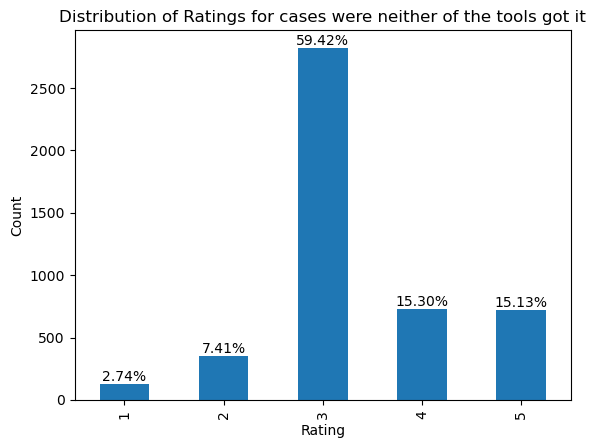

In [57]:
accurate = df[df['accurate_type'] == 'accurate']
no_accurate = df[df['accurate_type'] == 'no_accurate']

rating_counts = no_accurate['rating'].value_counts().sort_index()
total = rating_counts.sum()

rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings for cases were neither of the tools got it')
plt.xlabel('Rating')
plt.ylabel('Count')

for index, value in enumerate(rating_counts): #percentage per bar
    percentage = f'{(value / total) * 100:.2f}%'
    plt.text(index, value, percentage, ha='center', va='bottom')

plt.show()

### Most of the cases where none of the tools rated it accurately are rated by the Client with 3 stars, considering them Neutral. This is a clear limitation of the two tools, the main weakness of these are the cases categorized as neutral that do not express love or hate in an evident way.

### In addition, the number of words per review is another factor that may influence its correct classification, longer reviews may be more difficult to classify by these libraries. 

In [58]:
def count_words(text):
    return len(text.split())

df['word_count'] = df['review_text'].apply(count_words)

In [59]:
average_word_count = df.groupby('accurate_type')['word_count'].describe()
print(average_word_count)

                 count       mean        std  min   25%   50%   75%    max
accurate_type                                                             
accurate       17877.0  59.379650  28.585248  2.0  35.0  58.0  87.0  115.0
no_accurate    4751.0   63.343717  28.118852  2.0  40.0  63.0  92.0  115.0


### The longer the text is, the harder it is for the tool to classify it correctly. While the difference between a group where even one of the two tools was able to identify the meaning of the review, and the group where none of the tools matched the rating expressed by the user is not far off a median of 59.37 from 63.34. The third percentile is also slightly higher (87.0 - 92.0). However, the maxima and minima are the same for both groups.

# 6.0 Business insights

## 6.1 Trend's class opportunities based on reviews

In [60]:
df_trend_class = df[(df['class_name'] == 'Trend') & 
                    (df['rating'] < 3)]

In [61]:
selected_columns = df_trend_class[['age', 'rating', 'review_text']]

sorted_df = selected_columns.sort_values(by='rating')

display(sorted_df)

,age,rating,review_text
11858,64,1,"I was so excited about this top, and so disappointed when it arrived today. the lace part is lovely, but the skirt part is a crinoline type fabric that balloons out at the sides. it is gathered at the sides rather than pleated, and there is no way to get it to lay flat. the back center section is pleated. why couldn't they have had the pleats all around? this will be going back with much regret."
4301,51,1,I am not sure who would look good in this dress. it is extremely oversized with tons of fabric that will not flatter anyone!
4616,46,1,"This runs sooo big! i normally wear a large ( 145lb, 5'-4"", 36dd) but due to the limited sizing small or medium i chose small because it looked big on the model and this style of dress seem to run large. the size small that i ordered couldve fit two people easily together! i loved the pattern, color and the slip underneath actually fit well but i dont want to look like im wearing a tent, lol. also, the back is slightly longer than the front, something i couldnt see from the pictures online."
4834,25,1,"I thought this would be a cute business attire skirt. i hate to say it, but i felt like it flared out as if i were amelia bedelia or some whacky children's book character and not retailer. the fabric made it look bulky. i sadly had to return it."
6408,25,1,"The jeans look so different online! the pair i got did not have the stone washed look and was completely different cut. the rise is not as stated and is actually 10.5 inches! also, i'm a true 25 and the waist is like a 27, but the legs are super skinny. i'm so disappointed and i'm not even sure if is worth swapping out for a smaller size. these look more like men's cut jeans."
11004,43,1,"I had loved this on-line when i saw the pretty floral pattern. however, in person, it is such a disappointment. the quality of the fabric and the fit are just very poor."
18495,54,1,"The dress is pretty, i ordered a 4 and 6 not knowing how it ran, i took both back the neck is too tight!"
21174,57,1,I so wanted to like this dress i ordered it for summer graduation and weddings. i usually wear a 4/s and even the xs is was too pig. it drapes like a smock. the material is heavy. the only thing pretty about this dress is the pattern and color.\r\n\r\nstill looking for the perfect dress...
11864,53,1,"When i unwrapped this a chemical ""stink"" hit me that amost knocked me over. it was really unbearable and i m not overly sensitive to smells. second it was way too large with a boxy unflattering cut. the waist sits very high at elbow height and every below the waist the material balloons out in a rediculous manner. i wonder if they had it pinned down somehow on the picture here. with a more flattering cut i might have decided to wash it a few times to get the stink out. i do not recommend this fo"
15483,52,1,"I have purchased a lot from retailer but lately, some of the items have been disappointing in quality.verses cost, this being one. the picture is nice but the actual blouse is nothing like this. the size was not accurate so buy a size bigger because of the sleeves."


### About the Trend class filtered by a ratings under 3, out of 21, half of the reviews complains about the size of the product, saying that it is bigger or smaller that what they expect from a normal fit. Although a lot of them higlight to like the colors and patterns of the product, another importatn group found that the product's colors don't match the website's pictures. 

## 6.2 Case study: 100 products with the lowest average ratings

### Taking up the analysis made in section 3 of Exploratory Data analysis, this section will present the main points of improvement for the product. 

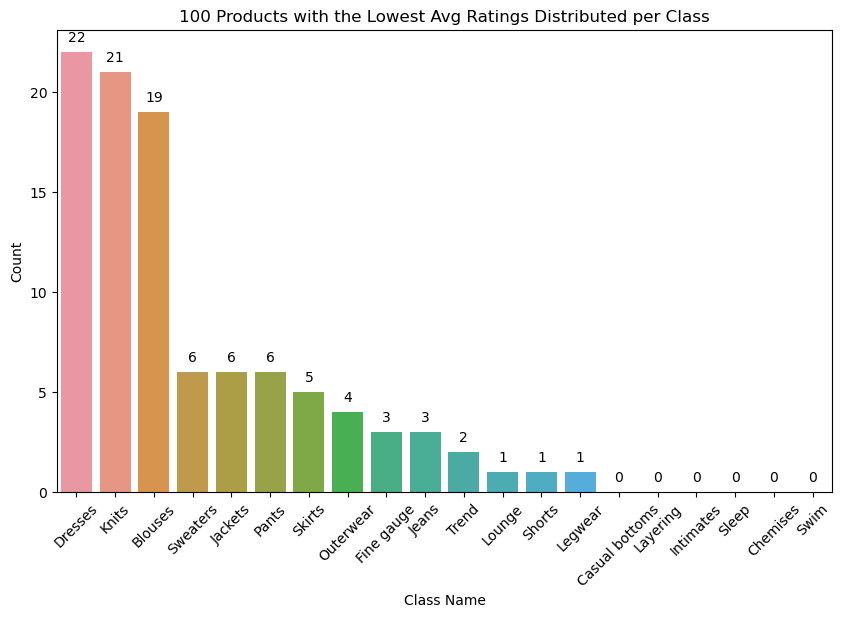

In [62]:
#counting per class
class_counts = lowest_avg_ratings['class_name'].value_counts()

plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='class_name', data=lowest_avg_ratings, order=class_counts.index)

#totals per bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

plt.title('100 Products with the Lowest Avg Ratings Distributed per Class')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  #rotation of labels
plt.show()

### Since dresses in general Division are the star product of this e-commerce, I thought it was important to find out the main points of improvement in a World Cloud. In order to obtain more accurate data, stopwords and some verbs that do not provide useful information have been removed.

In [63]:
dresses = lowest_avg_ratings[(lowest_avg_ratings['class_name'] == 'Dresses') & 
                             (lowest_avg_ratings['division_name'] == 'General')]

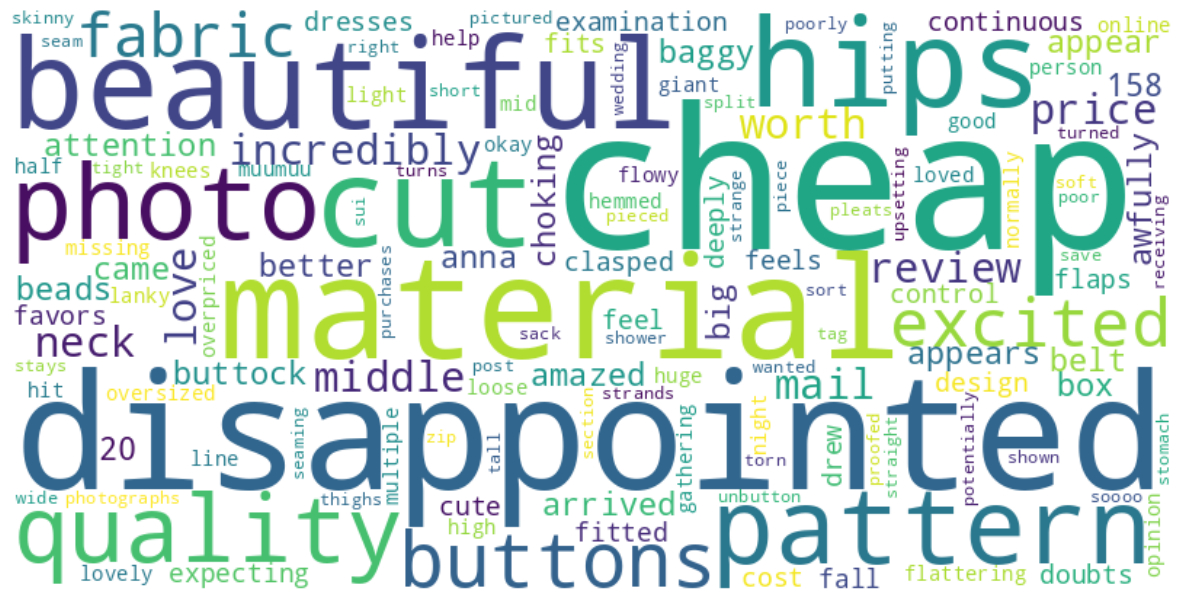

In [64]:
custom_stop_words = ['just', 'really', 'look','looked','wasn', 'received','trying','looking','started','isn','didn','felt', 'did','does', 'wear','know', 'couldn','tried', 'looks', 'way', 'ordered', 'dress', 'like', 'thought', 'doesn', 'don','ve','going','isnt', 'come','try', 'got' ] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Adding personalized words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

matrix = vectorizer.fit_transform(dresses['review_text'])
frequent_words = vectorizer.get_feature_names_out()
word_counts = matrix.sum(axis=0)
word_freq = dict(zip(frequent_words, word_counts.tolist()[0]))
#sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20] # Top 20 words
#sorted_word_freq

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Note to self: off the axis
plt.show()

In [65]:
def contains_key_words(text):
    words = word_tokenize(text.lower())  #tokenization
    return 'disappointed' in words or 'cheap' in words

filtered_df = lowest_avg_ratings[lowest_avg_ratings['review_text'].apply(contains_key_words)]
filtered_df = lowest_avg_ratings[(lowest_avg_ratings['class_name'] == 'Dresses') & 
                             (lowest_avg_ratings['division_name'] == 'General')]

display(filtered_df[['rating', 'review_text', 'clothing_id']])

,rating,review_text,clothing_id
11348,1,"I'm so disappointed. the dress looked lovely in the box, but when i started to unbutton it to try it on, two buttons split in half! it's going right back.",1079
8544,1,Was so excited to get this dress because i thought it was cute and i love flowy and big dresses - however this looks huge. the material is not soft so it doesn't fall well. it just stays proofed out so from the back you look like a giant!!,1088
1060,1,"There is no way this is worth the price. i was deeply disappointed when it arrived. the material is thin and feels cheap. i love the design, and anna sui, but this is just so overpriced.",1076
1389,1,"Looks fitted on, but this just turned out to be an oversized muumuu on. the fabric also felt cheap.",1087
1293,1,I'm so incredibly disappointed. the dress is beautiful but the one i received is torn and has multiple strands of beads missing. poor quality control.,1098
374,1,"I don't normally review my purchases, but i was so amazed at how poorly this dress was made, i couldn't help myself but to post a review. the neck line isn't even hemmed down so it flaps up. the material is thin and feel cheap. this dress isnt even worth $20 in my opinion. i was expecting a well made, good quality dress for the high price tag.",1104
2757,1,"This dress fits awfully. it's not short, as pictured in photo. it hit just above my knees. it looked like sack. i would've, also, felt like i was choking all night with it clasped around my neck. it, potentially, may look okay on someone who is very tall, skinny, and lanky, but i have my doubts about that too.",1103
6978,1,So disappointed! beautiful dress in the photographs but the cut was incredibly strange. loose and baggy through the top and mid-section but tight around the buttock and thighs.,1092
931,1,Very cheap looking material. looks cheap to cost $158.,1094
2041,1,This dress is so beautiful in person! but the quality was very upsetting. i had two buttons come off before even putting it on. i was so excited to get his dress for my wedding shower and then i couldn't wear it :(,1111


### Apparently is a big issue is that the quality of the product doesn't match the actual real product.

### Knits seem to be another good candidate for a deeper analysis to get ways of improving it.

In [66]:
knits = lowest_avg_ratings[(lowest_avg_ratings['class_name'] == 'Knits') & 
                             (lowest_avg_ratings['division_name'] == 'General')]
#display(dresses)

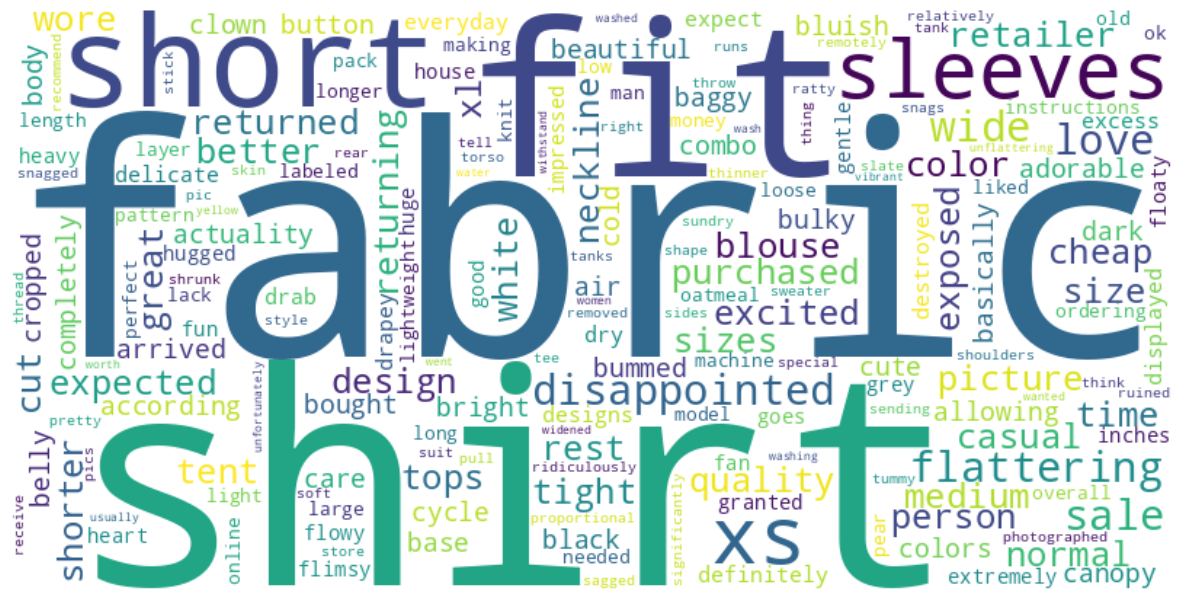

In [67]:
custom_stop_words = ['just', 'really', 'look','looked','wasn', 'received','trying','looking','started','isn','didn','felt', 'did','does', 'wear','know', 'couldn','tried', 'looks', 'way', 'ordered', 'dress', 'like', 'thought', 'doesn', 'don','ve','going','isnt', 'come','try', 'got' ] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Adding personalized words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

matrix = vectorizer.fit_transform(knits['review_text'])
frequent_words = vectorizer.get_feature_names_out()
word_counts = matrix.sum(axis=0)
word_freq = dict(zip(frequent_words, word_counts.tolist()[0]))
#sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20] # Top 20 words
#sorted_word_freq

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Note to self: off the axis
plt.show()

In [68]:
def contains_key_words(text):
    words = word_tokenize(text.lower())  #tokenization
    return 'fabric' in words or 'shirt' in words

filtered_df = lowest_avg_ratings[lowest_avg_ratings['review_text'].apply(contains_key_words)]
filtered_df = lowest_avg_ratings[(lowest_avg_ratings['class_name'] == 'Knits') & 
                             (lowest_avg_ratings['division_name'] == 'General')]

display(filtered_df[['rating', 'review_text', 'clothing_id']])

,rating,review_text,clothing_id
2167,1,"I was excited to receive this top. it looked great online, vibrant colors with the beautiful detail on the sleeves. when i tried it on, the fabric looked and felt cheap. it is not a flowy top. do not recommend it.",870
14516,1,I was really disappointed when i tried this top on. the design and cut of the neckline is very bulky and just off. the cut of the top overall was just off.,881
2660,1,"I purchased this top on sale and was really excited about the style. it fit great the first time i wore it. i washed it once, according to the care instructions. after washing it in cold water and allowing it to air dry, it was basically ruined. it shrunk up in length widened out about two inches. i'm pretty bummed about it because it was cute.",868
2666,1,I love sundry and their fun designs--i was disappointed because the fabric is very thin and the dark part of the heart is not black but bluish slate grey. it is just not what i expected from the picture. i bought the xs and it felt baggy on the body.,878
10267,1,I was very disappointed in the quality of this top. the first time i wore it it snagged right in the front. i had to pull the thread under so it wasn't exposed. i put it in the wash in the gentle cycle and it was destroyed with several more snags when i removed it from the machine. this top is extremely delicate and doesn't withstand normal everyday casual wear although it's s casual lightweight sweater. now it's just a wear around the house ratty throw around shirt.,879
4993,1,"I got this shirt in a medium, my normal retailer size and while the short fit, the front is cropped! i am a fan of the tops that are shorter in the front and longer in the back, however this was just too short in the front. my belly button was exposed, and that wasn't the look displayed on the model. unfortunately this top is going back to the store.",865
5569,1,This shirt would be perfect if i needed a canopy on my tent. this shirt runs ridiculously large. purchased a medium and it should be labeled an xl. no impressed with the pattern in person. looks cheap. will be returning.,880
5062,1,Even on sale sale...this tank is not worth the money. the design in the back is adorable & would expect it to be so much better quality but the fabric is flimsy(think old man white tanks that come in a pack) completely see through and lack of shape..i wanted to love this but definitely photographed significantly better than actuality!,871
1787,1,"Ordered a l and xl, the sleeves were so tight on both sizes but the rest of the shirt was wide and loose. the tight sleeves were not proportional with the rest of the shirt. both sizes had to be returned.",857
1319,1,It's short and wide. not a good combo for anyone who isn't stick thin.,860


### Fabric's quality seems to be the main problem.

## 6.2 Younger Audience in Intimates Division. Opportunities - Texblob and Vader: 

opportunities for improvement will be explored to attract the young public, which represents 30% of the dataframe and is for this simulation a key sector of the industry. 

In [69]:
young_intimates = df[(df['age'] <= 35) & (df['rating']<3)]

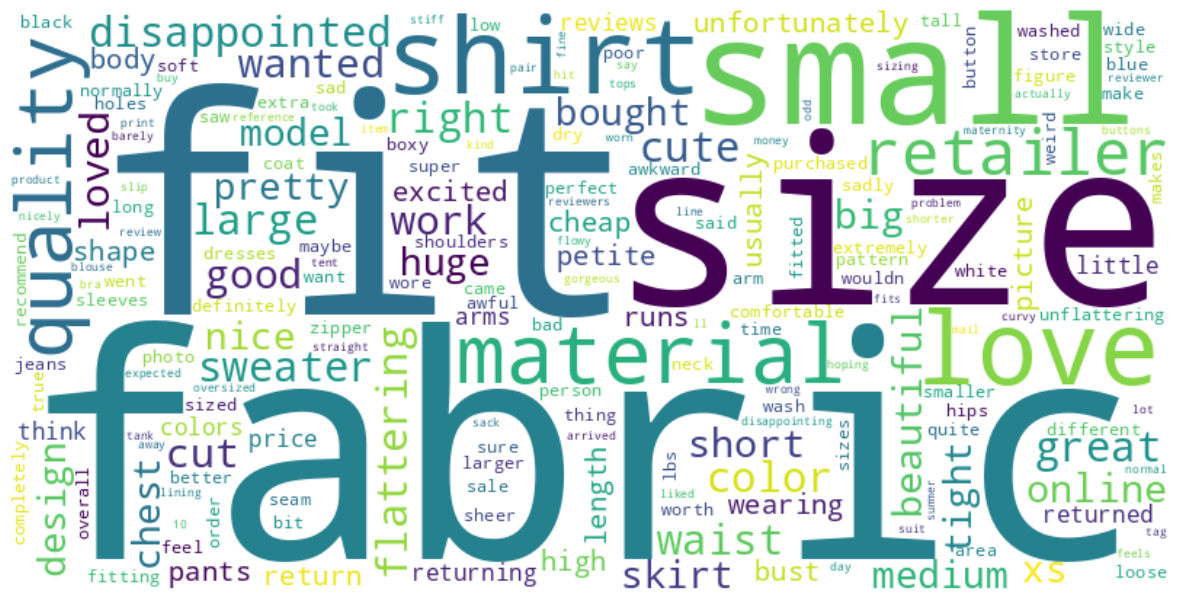

In [70]:
custom_stop_words = ['just', 'really', 'look','looked','wasn', 'received','trying','looking','started','isn','didn','felt', 'did','does', 'wear','know', 'couldn','tried', 'looks', 'way', 'ordered', 'dress', 'like', 'thought', 'doesn', 'don','ve','going','isnt', 'come','try', 'got' ] 

combined_stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words) #Adding personalized words 

combined_stop_words_list = list(combined_stop_words) #Note to self: convert into a list for analysis

vectorizer = CountVectorizer(stop_words=combined_stop_words_list)

matrix = vectorizer.fit_transform(young_intimates['review_text'])
frequent_words = vectorizer.get_feature_names_out()
word_counts = matrix.sum(axis=0)
word_freq = dict(zip(frequent_words, word_counts.tolist()[0]))
#sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20] # Top 20 words
#sorted_word_freq

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  #Note to self: off the axis
plt.show()

In [71]:
def contains_key_words(text):
    words = word_tokenize(text.lower())  #tokenization
    return 'disappointed' in words #or 'medium' in words

filtered_df = young_intimates[young_intimates['review_text'].apply(contains_key_words)]

display(filtered_df[['rating', 'review_text', 'clothing_id']])

,rating,review_text,clothing_id
111,2,"The design/shape of the dress are quite flattering, flirty and feminine. but.... there is no way that the dress i received is new. the color is a faded washed out red and there are black stains all over the belt area. there is no tag... the fabric looks droopy and laundered and is not crisp, stiff or new. i am very disappointed by the quality of the item that i received. undoubtedly this one is going back.\n\ndear retailer - please make sure that you do not send pre-owend clothing articles to",1082
433,2,"Three strikes and retailer is out for me! i am so disappointed. i really liked this dress and was looking for a fun, distinctive new shift dress. got it, tried it on, took it off, went back to look at the listing online...nowhere does it mention that it has a drop-seam in the shoulders. i guess you can see it if you zoom in closely on the image, but it's not mentioned in the text. who on god's green earth actually looks good with a drop-shoulder?! it hits every woman under 5'10"" right in the middl",1077
614,2,"I love the fit of these pants -- they're the perfect slim black pants. however, i wore these pants exactly three times before the seams split the middle of the pant in not just one, but multiple places. disappointed by the workmanship/quality of the product, especially since the pants fit amazingly and don't sag like other slim fitting black pants tend to do. i hope retailer will take this into consideration and improve the quality of future iterations of this product.",1059
639,2,"I tried this on in the store and was disappointed because it looked so fresh and vibrant on the hanger. but it's basically cut for model-sized people only. it's short and wide, and if you have any boobs at all it'll make the back pucker. i can't imagine this will look good on most women.",838
768,2,"Ladies this top shrinks!!! i am very disappointed, i was in love with this top and the first time i washed it it shrunk a significant amount. i did not use a dryer, i laid this piece out to dry as i do with the majority of my knit tops and it shrunk. it is a lot shorter and much tighter, especially in my arms. if you love this top i might suggest buying a size up and washing it to fit.",886
...,...,...,...
21802,1,Just wanted to review so people know this hoodie has a zipper. it's very soft and comfy but i was looking for a pullover hoodie and am disappointed that once again retailer's picture doesn't match the actual product. it does fit true to size however.,455
22147,1,"I've been buying from retailer for the last 15 years and this is the first time i've ever posted a bad review. first of all the fabric is scratchy, thin, and looks very cheap. second of all there is no v back, it's more of a slight scoop. and lastly i'm 5'3"" so i ordered the petite small and it's still comes 4 inches below my knee. i am very disappointed in the quality and am definitely sending back. the only thing i think this could possible good for is a swim coverup.",1089
22181,2,I was expecting a nice golden yellow color but what i received was very dull in color with greenish undertones. very disappointed. will be returning.,940
22286,1,"I'm so disappointed this dress didn't work out! i ordered the size medium, post baby i'm a solid dress size 6 or 8 depending on the designer.\r\nthe cashier was laughing with me how ridiculously huge this garment was when i held it up. \r\n\r\nalso the length was super long, description says 35"" which would be mid thigh for me, but this thing hit me mid knee. also, like the previous review the shoulders are tented and poofy. so bizarre and the cut reminds me of a maternity dress, but the shoulders def",1079


# 7. Conclusion <a class="anchor"  id="section7"></a>

# 8. References

Sources of inspiration:

* [Sentiment Analysis in Python: TextBlob vs Vader Sentiment vs Flair vs Building It From Scratch](https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair)
* [Simple Sentiment Analysis for NLP Beginners and Everyone Else using VADER and TextBlob](https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d)
* [NLP-Day 5: Feelings Are Important. A Basic Sentiment Analysis](https://medium.com/mlearning-ai/nlp-day-5-feelings-are-important-a-basic-sentiment-analysis-c09cb01a6bf8)
* [Sentiment Analysis using TextBlob](https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524)
* [Sentiment Analysis using TextBlob](https://medium.com/analytics-vidhya/sentiment-analysis-using-textblob-ecaaf0373dff)
* [How to Obtain a Sentiment Score for a Sentence Using TextBlob?](https://analyticsindiamag.com/how-to-obtain-a-sentiment-score-for-a-sentence-using-textblob/)

Thanks for reading! 
Any suggestions are welcomed :)